In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('../data/raw/fc24_male_players.csv')

C:\Users\123\AppData\Local\Temp\ipykernel_9952\2547287311.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/fc24_male_players.csv')


In [3]:
df.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [4]:
df

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,220806,https://sofifa.com/player/220806/ellis-redman/...,15.0,2.0,2014-09-18,E. Redman,Ellis Redman,CB,41,61,...,38,38,38,37,40,41,41,41,40,10
180017,225509,https://sofifa.com/player/225509/aaron-collins...,15.0,2.0,2014-09-18,A. Collins,Aaron Graham John Collins,ST,41,50,...,30,30,30,31,32,31,31,31,32,14
180018,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,15.0,2.0,2014-09-18,P. Żemło,Piotr Żemło,"LM, LB",40,50,...,46,46,46,48,51-1,53-3,53-3,53-3,51-1,12
180019,222947,https://sofifa.com/player/222947/tom-davies/15...,15.0,2.0,2014-09-18,T. Davies,Thomas Christopher Davies,CB,40,49,...,36,36,36,37,39,40,40,40,39,13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


In [6]:
df.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,180021.000000,180021.000000,180021.0,180021.000000,180021.000000,1.778680e+05,178173.00000,180021.000000,180021.000000,180021.000000,...,147133.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,20024.000000
mean,217326.670294,19.621450,2.0,65.712711,70.779581,2.379142e+06,10638.01081,25.138689,181.287061,75.233356,...,57.837807,45.851456,47.759511,45.764783,16.509979,16.260136,16.129902,16.276951,16.615517,38.750300
std,35215.749284,2.838621,0.0,7.018104,6.255569,6.184358e+06,21637.41400,4.679389,6.764179,6.999181,...,12.305995,20.452502,21.309061,20.899683,17.661659,16.846583,16.499513,17.009393,17.971201,10.578237
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.00000,16.000000,154.000000,49.000000,...,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,200759.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.00000,21.000000,176.000000,70.000000,...,50.000000,26.000000,27.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,30.000000
50%,222734.000000,20.000000,2.0,66.000000,71.000000,7.500000e+05,4000.00000,25.000000,181.000000,75.000000,...,59.000000,51.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,40.000000
75%,239858.000000,22.000000,2.0,70.000000,75.000000,1.800000e+06,10000.00000,28.000000,186.000000,80.000000,...,66.000000,63.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,46.000000
max,278145.000000,24.000000,2.0,94.000000,95.000000,1.940000e+08,575000.00000,54.000000,208.000000,110.000000,...,96.000000,94.000000,94.000000,95.000000,91.000000,92.000000,95.000000,92.000000,94.000000,68.000000


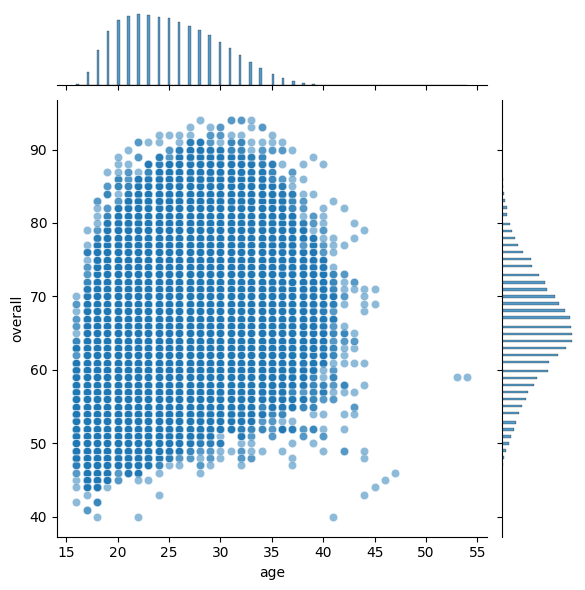

In [7]:
sns.jointplot(x='age', y='overall', data=df, alpha=0.5)

In [8]:
df_selected = df[['overall', 'potential', 'value_eur', 'wage_eur', 'age']]
df_selected

,overall,potential,value_eur,wage_eur,age
0,91,94,181500000.0,230000.0,24
1,91,94,185000000.0,340000.0,22
2,91,91,103000000.0,350000.0,32
3,90,90,41000000.0,23000.0,36
4,90,90,51000000.0,95000.0,35
...,...,...,...,...,...
180016,41,61,20000.0,2000.0,17
180017,41,50,30000.0,2000.0,17
180018,40,50,15000.0,2000.0,18
180019,40,49,15000.0,2000.0,22


In [9]:
df_encoded = pd.get_dummies(df_selected)

In [22]:
X = df_encoded.dropna(axis=1)
X = X.apply(pd.to_numeric, errors='coerce')
X

,overall,potential,age
0,91,94,24
1,91,94,22
2,91,91,32
3,90,90,36
4,90,90,35
...,...,...,...
180016,41,61,17
180017,41,50,17
180018,40,50,18
180019,40,49,22


In [23]:
y = df['overall']

In [24]:
X.head()
y.head()

0    91
1    91
2    91
3    90
4    90
Name: overall, dtype: int64

In [25]:
y = y[X.index]
y

0         91
1         91
2         91
3         90
4         90
          ..
180016    41
180017    41
180018    40
180019    40
180020    40
Name: overall, Length: 180021, dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [47]:
lm.fit(X_train, y_train)

LinearRegression()

In [48]:
X

,overall,potential,age
0,91,94,24
1,91,94,22
2,91,91,32
3,90,90,36
4,90,90,35
...,...,...,...
180016,41,61,17
180017,41,50,17
180018,40,50,18
180019,40,49,22


In [49]:
lm.coef_

array([ 1.0000000e+00, -4.7386859e-16, -2.0881126e-16])

In [50]:
lm.score(X, y)

1.0

In [51]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Ability')

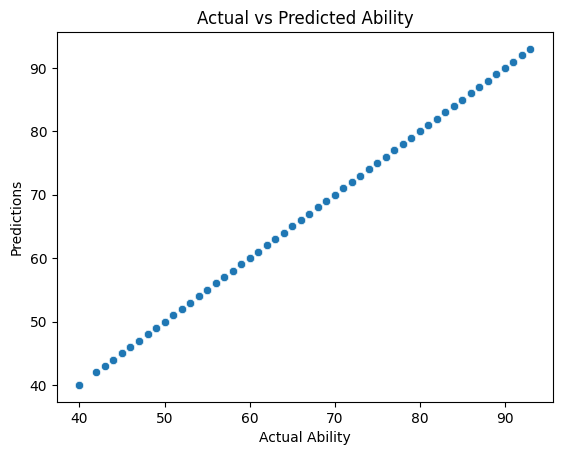

In [52]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Ability')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Ability')